In [5]:
from transformers import pipeline
from transformers import is_torch_available
from PIL import Image
import torch
import requests
print(torch.__version__)
print(is_torch_available())
#   from google.colab import drive
#   drive.mount('/content/drive', force_remount=True)

  # load pipe
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Metric-Outdoor-Large-hf")

  # load image
  # url = '/content/drive/MyDrive/Colab Notebooks/depth_test.jpg'
  # image = Image.open(requests.get(url, stream=True).raw)
image = Image.open('/home/zeyad/Pictures/Webcam/1.jpg')

  # inference
depth = pipe(image)["depth"]

/home/zeyad/VScode/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.5.1+cu124
True
2.5.1+cu124
True


Device set to use cpu


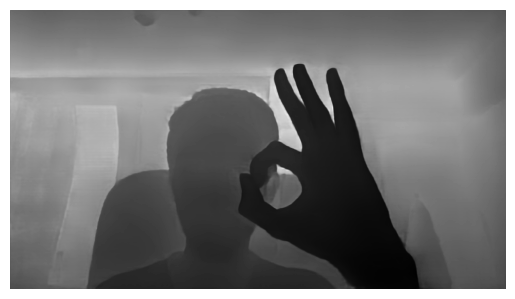

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
# depth = cv.cvtColor(depth, cv.COLOR_BGR2GRAY)
plt.imshow(depth, cmap='grey')
plt.axis('off')
plt.show()
# np.array(depth)

In [7]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = (22.5 * np.mgrid[0:7,0:6]).T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
cam = cv.VideoCapture("/home/zeyad/Downloads/calib.avi")
if cv.VideoCapture.isOpened(cam) :
    print("Camera found")
else:
    print("Camera not found")
images = []
frameno = 0
while(frameno < 500):
   ret,frame = cam.read()
   if ret:
      # if video is still left continue creating images
      name = str(frameno) + '.jpg'
      frameno = frameno + 1
      cv.imwrite(name, frame)
      img = cv.imread(name)
      ############################3
      gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

      # Find the chess board corners
      ret, corners = cv.findChessboardCorners(gray, (7,6), None)

      # If found, add object points, image points (after refining them)
      if ret == True:
        objpoints.append(objp)

        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        # cv.imshow('img', img)
        # cv.waitKey(500)
        #plt.imshow(img)
        #plt.axis('off')
        #plt.show()
   else:
      break
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
np.array(mtx)
#cam.release()
#cv.destroyAllWindows()

# cv.destroyAllWindows()

Camera found


array([[716.28934316,   0.        , 690.19844415],
       [  0.        , 702.68766713, 302.76373825],
       [  0.        ,   0.        ,   1.        ]])

In [8]:
import cv2 as cv
NOP = 0 #number of points selected
points = [[1,1], [1,1]]
def click_event(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN: 
        print(x, ' ', y)
        global NOP
        global points
        points[NOP][0] = x
        points[NOP][1] = y
        NOP = NOP + 1

GUI = cv.imread('/home/zeyad/VScode/.vscode/41.jpg')
cv.imshow('image', GUI)
cv.setMouseCallback('image', click_event)
cv.waitKey(0)
cv.destroyAllWindows()

834   363
206   361


In [22]:
np.array(depth)

array([[122, 113, 104, ...,  87,  97, 105],
       [114, 110, 105, ...,  87,  92,  93],
       [105, 106, 107, ...,  86,  85,  83],
       ...,
       [ 73,  76,  78, ...,  70,  70,  72],
       [ 73,  75,  77, ...,  70,  70,  71],
       [ 73,  75,  77, ...,  71,  71,  72]],
      shape=(720, 1280), dtype=uint8)

In [21]:
from math import sqrt
SensorWidth = 4.8 
SensorHeight = 3.6
Z1 = np.array(depth).transpose()[points[0][0]][points[0][1]]
X1 = ((points[0][0] - mtx[0][2]) * Z1 )/ mtx[0][0]
Y1 = ((points[0][1]) - mtx[1][2]) * Z1 / mtx[1][1]
Z2 = np.array(depth).transpose()[points[1][0]][points[1][1]]
X2 = ((points[1][0] - mtx[0][2]) * Z2) / mtx[0][0]
Y2 = ((points[1][1] - mtx[1][2]) * Z2) / mtx[1][1]
Length = sqrt((X2 - X1)**2 + (Y2 - Y1)**2 + (Z2 - Z1)**2)
Length

125.73495699861729